In [362]:
import pandas as pd
import sklearn as sk
import plotly
import plotly.graph_objects as go
import seaborn as sn
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [376]:
all_stars = pd.read_csv('All-Star Selections.csv')
statistics = pd.read_csv("Player Per Game.csv")
statistics.drop_duplicates(inplace=True, subset=["player", "season"])
def knn_classify(number_of_neighbors, training_year, test_year, feature_1, feature_2, feature_3):
    training_year_all_stars = (all_stars[all_stars["season"] == training_year]["player"]).tolist()
    test_year_all_stars = (all_stars[all_stars["season"] == test_year]["player"]).tolist()

    tagged_training_year_statistics = statistics[statistics["season"] == training_year][["season", "player", feature_1, feature_2, feature_3]].dropna()
    tagged_training_year_statistics['all_star'] = tagged_training_year_statistics['player'].apply(lambda x: 1 if x in training_year_all_stars else 0)
    tagged_test_year_statistics = statistics[statistics["season"] == test_year][["season", "player", feature_1, feature_2, feature_3]].dropna()
    tagged_test_year_statistics['all_star'] = tagged_test_year_statistics['player'].apply(lambda x: 1 if x in test_year_all_stars else 0)
    
    X_train = list(zip(tagged_training_year_statistics[feature_1], tagged_training_year_statistics[feature_2], tagged_training_year_statistics[feature_3]))
    y_train = tagged_training_year_statistics['all_star']
    
    X_test = list(zip(tagged_test_year_statistics[feature_1], tagged_test_year_statistics[feature_2], tagged_test_year_statistics[feature_3]))
    y_test = tagged_test_year_statistics['all_star']
    
    knn = KNeighborsClassifier(n_neighbors=number_of_neighbors)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    return (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, zero_division=0))
    

In [377]:
knn_classify(5, 2022, 2023, "pts_per_game", "ast_per_game", "trb_per_game")

(0.966542750929368, 0.6666666666666666)

In [349]:
accuracies = []
recalls = []
for i in range(1951, 2024):
    year_accuracies = []
    year_recalls = []
    for j in range(1951, 2024):
        result = knn_classify(5, i, j, "pts_per_game", "ast_per_game", "trb_per_game")
        year_accuracies.append(result[0])
        year_recalls.append(result[1])
    accuracies.append(year_accuracies)
    recalls.append(year_recalls)

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'Accuracy Heatmap')

[Text(0.5, 201.75999999999993, 'Test Year'), Text(124.0, 0.5, 'Training Year')]

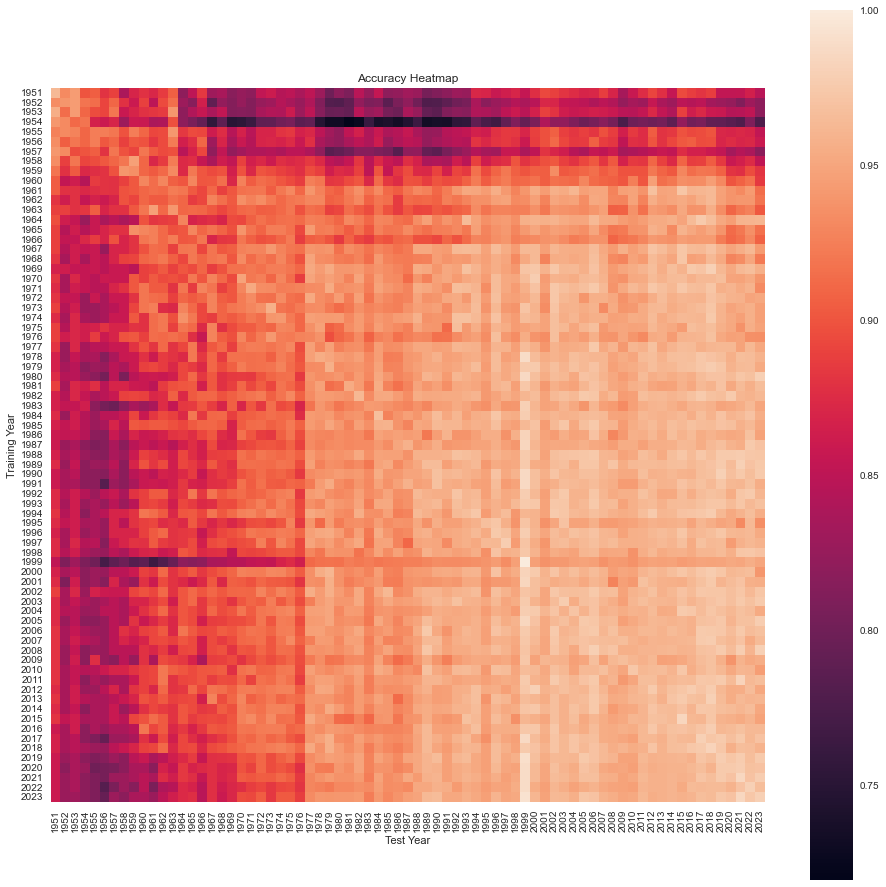

In [350]:
plt.style.use("seaborn")
plt.figure(figsize=(16,16))
plt.title( "Accuracy Heatmap" )

hm = sn.heatmap(data = accuracies, square = True, xticklabels = range(1951, 2024), yticklabels = range(1951, 2024))

hm.set(xlabel = "Test Year", ylabel = "Training Year")
  
# displaying the plotted heatmap
plt.show()

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'Recall Heatmap')

[Text(0.5, 201.75999999999993, 'Test Year'), Text(124.0, 0.5, 'Training Year')]

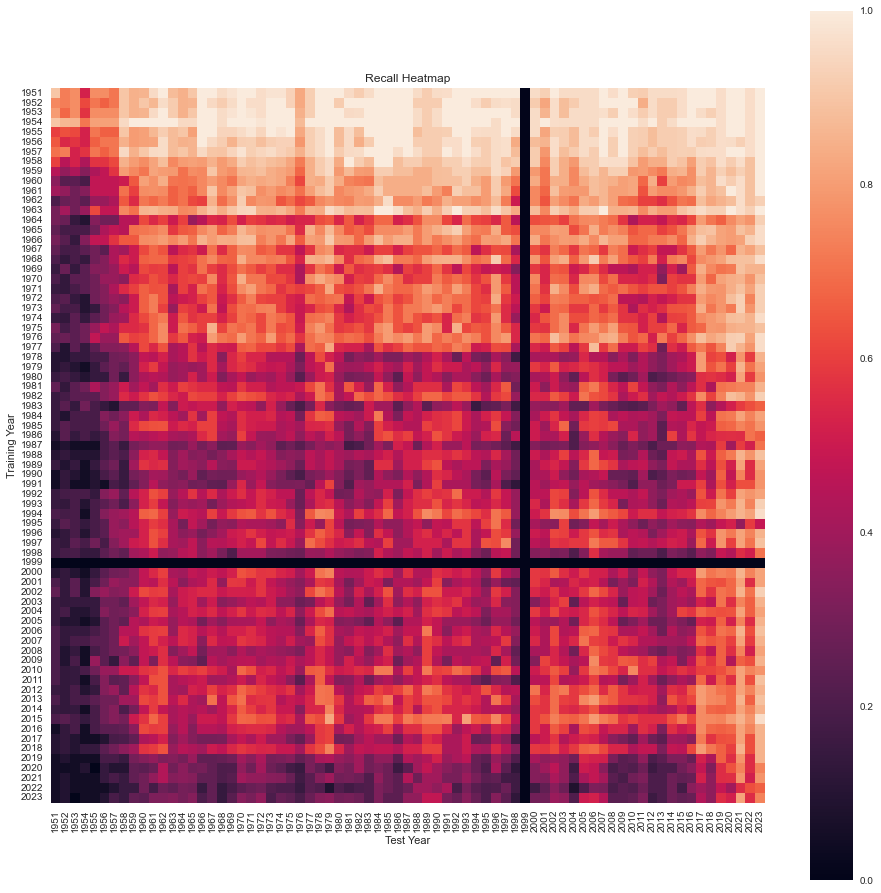

In [352]:
plt.style.use("seaborn")
plt.figure(figsize=(16,16))
plt.title( "Recall Heatmap" )

hm = sn.heatmap(data = recalls, square = True, xticklabels = range(1951, 2024), yticklabels = range(1951, 2024))

hm.set(xlabel = "Test Year", ylabel = "Training Year")
  
# displaying the plotted heatmap
plt.show()

In [398]:
# Helper function to get the results for the all-stars
def is_all_star(name, year, allstar_df):
    temp_df = allstar_df.loc[(allstar_df["player"] == name) & (allstar_df["season"] == year)]
    if len(temp_df) == 0:
        return 0
    return 1

In [404]:
    tagged_player_per_game_data = player_per_game_data.copy()
    tagged_player_per_game_data['is-all-star'] = tagged_player_per_game_data.apply(lambda x: is_all_star(x["player"], x["season"], all_stars), axis=1)
    tagged_player_per_game_data = tagged_player_per_game_data.drop_duplicates(subset=['player', 'season'])
    tagged_player_per_game_data = tagged_player_per_game_data.drop(columns=['seas_id', 'birth_year', 'player_id', 'gs'])
    tagged_player_per_game_data = tagged_player_per_game_data.dropna()

In [420]:
all_stars = pd.read_csv('All-Star Selections.csv')
statistics = pd.read_csv("Player Per Game.csv")
statistics.drop_duplicates(inplace=True, subset=["player", "season"])
def knn_classify_year_range(number_of_neighbors, years, feature_1, feature_2, feature_3):
    years_split = years.split('.')
    year_start = int(years_split[0])
    year_end = int(years_split[1])
    temp_df = tagged_player_per_game_data.copy()
    temp_df = temp_df.loc[(temp_df['season'] >= year_start) & (temp_df['season'] < year_end)]
    #X = temp_df.drop(columns=['player', 'pos', 'season', 'is-all-star', 'lg', 'tm'])
    X = temp_df[[feature_1, feature_2, feature_3]]
    y = temp_df['is-all-star'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    knn = KNeighborsClassifier(n_neighbors=number_of_neighbors)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    return (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, zero_division=0))

In [424]:
knn_classify_year_range(6, '2019.2023', "pts_per_game", "ast_per_game", "trb_per_game")

(0.9748110831234257, 0.625)

In [ ]:
# What three features are the best predictor for 2010s

In [438]:
features = ['experience', 'g', 'mp_per_game' ,'fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent', 'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game', 'pts_per_game']
#features = ['experience', 'g', 'mp_per_game' ,'fg_per_game', 'fga_per_game', 'fg_percent']
results = []

for i in range(len(features)):
    for j in range(len(features)):
        for k in range(len(features)):
            if i != j and i != k and j != k:
                result = knn_classify_year_range(5, '2010.2020', features[i], features[j], features[k])
                results.append((features[i], features[j], features[k], result[0], result[1]))
                
max_accuracy = results[0]
max_recall = results[0]

for i in range(len(results)):
    if results[i][3] > max_accuracy[3]:
        max_accuracy = results[i]
    if results[i][4] > max_recall[4]:
        max_recall = results[i]
        
print("Max accuracy: ", max_accuracy[:3], max_accuracy[3])
print("Max recall: ", max_recall[:3], max_recall[4])
                

Max accuracy:  ('fta_per_game', 'ast_per_game', 'pts_per_game') 0.963985594237695
Max recall:  ('fta_per_game', 'ast_per_game', 'pts_per_game') 0.6551724137931034


In [439]:
def find_three_best_features(years):
    #features = ['experience', 'g', 'mp_per_game' ,'fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent', 'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game', 'pts_per_game']
    features = ['experience', 'g', 'mp_per_game' ,'fg_per_game', 'fga_per_game', 'fg_percent']
    results = []

    for i in range(len(features)):
        for j in range(len(features)):
            for k in range(len(features)):
                if i != j and i != k and j != k:
                    result = knn_classify_year_range(5, years, features[i], features[j], features[k])
                    results.append((features[i], features[j], features[k], result[0], result[1]))

    max_accuracy = results[0]
    max_recall = results[0]

    for i in range(len(results)):
        if results[i][3] > max_accuracy[3]:
            max_accuracy = results[i]
        if results[i][4] > max_recall[4]:
            max_recall = results[i]

    print("Max accuracy: ", max_accuracy[:3], max_accuracy[3])
    print("Max recall: ", max_recall[:3], max_recall[4])

In [445]:
find_three_best_features('1970.1980')

Max accuracy:  ('g', 'mp_per_game', 'fg_percent') 0.9354838709677419
Max recall:  ('g', 'mp_per_game', 'fg_per_game') 0.75


In [ ]:
# How has the evolution of the game influenced all star selection

In [466]:
knn_classify_year_range(6, '1980.1990', 'x3p_per_game', 'x3pa_per_game', 'x3p_percent')

(0.875, 0.0)

In [451]:
knn_classify_year_range(6, '1990.2000', 'x3p_per_game', 'x3pa_per_game', 'x3p_percent')

(0.9276218611521418, 0.0)

In [452]:
knn_classify_year_range(6, '2000.2010', 'x3p_per_game', 'x3pa_per_game', 'x3p_percent')

(0.9182825484764543, 0.03508771929824561)

In [460]:
knn_classify_year_range(6, '2013.2023', 'x3p_per_game', 'x3pa_per_game', 'x3p_percent')

(0.9503311258278145, 0.0625)

In [259]:
all_stars = pd.read_csv('All-Star Selections.csv')
statistics = pd.read_csv("Player Per Game.csv")
statistics.drop_duplicates(inplace=True, subset=["player", "season"])
def logreg_classify(training_year, test_year, feature_1, feature_2, feature_3):
    training_year_all_stars = (all_stars[all_stars["season"] == training_year]["player"]).tolist()
    test_year_all_stars = (all_stars[all_stars["season"] == test_year]["player"]).tolist()
    
    training_year_all_star_stats = statistics[statistics["season"] == training_year].loc[statistics[statistics["season"] == training_year]["player"].isin(training_year_all_stars)][["season", "player", feature_1, feature_2, feature_3]]
    training_year_non_all_star_stats = statistics[statistics["season"] == training_year].loc[~statistics[statistics["season"] == training_year]["player"].isin(training_year_all_stars)][["season", "player", feature_1, feature_2, feature_3]]
    test_year_all_star_stats = statistics[statistics["season"] == test_year].loc[statistics[statistics["season"] == test_year]["player"].isin(test_year_all_stars)][["season", "player", feature_1, feature_2, feature_3]]
    test_year_non_all_star_stats = statistics[statistics["season"] == test_year].loc[~statistics[statistics["season"] == test_year]["player"].isin(test_year_all_stars)][["season", "player", feature_1, feature_2, feature_3]]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=training_year_all_star_stats[feature_1], y=training_year_all_star_stats[feature_2], z=training_year_all_star_stats[feature_3],
                                       mode='markers', text=training_year_all_star_stats['player'], name='all-stars'))
    fig.add_trace(go.Scatter3d(x=training_year_non_all_star_stats[feature_1], y=training_year_non_all_star_stats[feature_2], z=training_year_non_all_star_stats[feature_3],
                                       mode='markers', text=training_year_non_all_star_stats['player'], name='non-all-stars'))
    fig.update_layout()
    fig.layout.title.text = str(feature_1 + " vs. " + feature_2 + " vs. " + feature_3)
    fig.show()
    print("x: " + feature_1)
    print("y: " + feature_2)
    print("z: " + feature_3)
    print("\n")
    
    tagged_training_year_statistics = statistics[statistics["season"] == training_year][["season", "player", feature_1, feature_2, feature_3]]
    tagged_training_year_statistics['all_star'] = tagged_training_year_statistics['player'].apply(lambda x: 1 if x in training_year_all_stars else 0)
    tagged_test_year_statistics = statistics[statistics["season"] == test_year][["season", "player", feature_1, feature_2, feature_3]]
    tagged_test_year_statistics['all_star'] = tagged_test_year_statistics['player'].apply(lambda x: 1 if x in test_year_all_stars else 0)
    
    X_train = list(zip(tagged_training_year_statistics[feature_1], tagged_training_year_statistics[feature_2], tagged_training_year_statistics[feature_3]))
    y_train = tagged_training_year_statistics['all_star']
    
    X_test = list(zip(tagged_test_year_statistics[feature_1], tagged_test_year_statistics[feature_2], tagged_test_year_statistics[feature_3]))
    y_test = tagged_test_year_statistics['all_star']
    
    logreg = LogisticRegression(solver="saga", max_iter=10000)
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    
    return (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred))


In [257]:
logreg_classify(1992, 1993, "pts_per_game", "ast_per_game", "trb_per_game")

x: pts_per_game
y: ast_per_game
z: trb_per_game


Accuracy: 0.9666666666666667
Precision: 0.8823529411764706
Recall: 0.5769230769230769


allstar_selections_data = pd.read_csv('All-Star Selections.csv')
allstar_2022 = allstar_selections_data[allstar_selections_data["season"] == 2022]
allstar_2022_list = allstar_2022["player"].tolist()
allstar_2023 = allstar_selections_data[allstar_selections_data["season"] == 2023]
allstar_2023_list = allstar_2023["player"].tolist()

In [9]:
# loading player statistics
player_per_game_data = pd.read_csv("Player Per Game.csv")
allstar_2022_player_data = player_per_game_data[player_per_game_data["season"] == 2022]
not_allstar_2022_player_data = allstar_2022_player_data.loc[~allstar_2022_player_data["player"].isin(allstar_2022_list)]
allstar_2022_player_data = allstar_2022_player_data.loc[allstar_2022_player_data["player"].isin(allstar_2022_list)]
allstar_2022_player_data = allstar_2022_player_data[["season", "player", "pos", "pts_per_game", "ast_per_game", "trb_per_game"]]


In [14]:
allstar_2022_player_data

,season,player,pos,pts_per_game,ast_per_game,trb_per_game
706,2022,Andrew Wiggins,SF,17.2,2.2,4.5
792,2022,Chris Paul,PG,14.7,10.8,4.4
836,2022,Darius Garland,PG,21.7,8.6,3.3
860,2022,Dejounte Murray,PG,21.1,9.2,8.3
862,2022,DeMar DeRozan,PF,27.9,4.9,5.2
882,2022,Devin Booker,SG,26.8,4.8,5.0
896,2022,Donovan Mitchell,SG,25.9,5.3,4.2
902,2022,Draymond Green,PF,7.5,7.0,7.3
931,2022,Fred VanVleet,PG,20.3,6.7,4.4
950,2022,Giannis Antetokounmpo,PF,29.9,5.8,11.6


In [6]:
allstar_2023_player_data = player_per_game_data[player_per_game_data["season"] == 2023]
not_allstar_2023_player_data = allstar_2023_player_data.loc[~allstar_2023_player_data["player"].isin(allstar_2023_list)]
allstar_2023_player_data = allstar_2023_player_data.loc[allstar_2023_player_data["player"].isin(allstar_2023_list)]
allstar_2023_player_data = allstar_2023_player_data[["season", "player", "pos", "pts_per_game", "ast_per_game", "trb_per_game"]]

In [8]:
tagged_2022_data = player_per_game_data[player_per_game_data["season"] == 2022]
tagged_2022_data = tagged_2022_data.drop_duplicates(subset=['player'], keep='first')
tagged_2022_data = tagged_2022_data[["season", "player", "pos", "pts_per_game", "ast_per_game", "trb_per_game"]]
tagged_2022_data['all-star'] = tagged_2022_data['player'].apply(lambda x: 1 if x in allstar_2022_list else 0)
tagged_2023_data = player_per_game_data[player_per_game_data["season"] == 2022]
tagged_2023_data = tagged_2023_data[["season", "player", "pos", "pts_per_game", "ast_per_game", "trb_per_game"]]
tagged_2023_data = tagged_2023_data.drop_duplicates(subset=['player'], keep='first')
tagged_2023_data['all-star'] = tagged_2023_data['player'].apply(lambda x: 1 if x in allstar_2023_list else 0)
x = tagged_2022_data['pts_per_game']
y = tagged_2022_data['ast_per_game']
z = tagged_2022_data['trb_per_game']
X_train = list(zip(x,y,z))
y_train = tagged_2022_data['all-star']

In [9]:
new_x = tagged_2023_data['pts_per_game'].tolist()
new_y = tagged_2023_data['ast_per_game'].tolist()
new_z = tagged_2023_data['trb_per_game'].tolist()
actual_allstars_2023 = tagged_2023_data['all-star'].tolist()
actual_allstars_names_2023 = tagged_2023_data['player'].tolist()
X_test = list(zip(new_x, new_y, new_z))

In [70]:
log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X_train, y_train)

LogisticRegression()

In [67]:
predictions_2022 = log_reg.predict(X_train)
predictions_2023 = log_reg.predict(X_test)

In [68]:
total_allstar = len(allstar_2023_list)
total_non_allstar = len(tagged_2023_data) - total_allstar
true_allstar = len([(actual_allstars_names_2023[i], predictions_2023[i]) for i in range(len(predictions_2023)) if (predictions_2023[i] == actual_allstars_2023[i]) and predictions_2023[i] == 1])
false_allstar = len([(actual_allstars_names_2023[i], predictions_2023[i]) for i in range(len(predictions_2023)) if (predictions_2023[i] != actual_allstars_2023[i]) and predictions_2023[i] == 1])
true_non_allstar = len([(actual_allstars_names_2023[i], predictions_2023[i]) for i in range(len(predictions_2023)) if (predictions_2023[i] == actual_allstars_2023[i]) and predictions_2023[i] == 0])
false_non_allstar = len([(actual_allstars_names_2023[i], predictions_2023[i]) for i in range(len(predictions_2023)) if (predictions_2023[i] != actual_allstars_2023[i]) and predictions_2023[i] == 0])

In [69]:
print("Total Accuracy for 2023 all-stars", round(true_allstar/total_allstar, 2))

Total Accuracy for 2023 all-stars 0.59
